# Project 3 : Subreddit Classification

## Problem Statement

To classify whether a post is an uplifting news for reddit to boost positivity within the community, by recommending those uplifting news on the main page.

## Objective

1) To webscrape data from subreddit World News & Uplifting News through Json API

2) Clean and prepare data for classification model validation

3) Valid among 3 classification model: Logistic, Multinomial & Random Forest

4) Choose 1 model for to make prediction and inference

## Executive Summary

Reddit is home to thousands of community and plays an influencing role in the social media space along side Facebook, Twitter etc. Research has shown that that when people are reminded of their mortality, their defense of their cultural worldview intensifies, and there is potential to experience anxiety when that occurs ([Source](https://journals.sagepub.com/doi/abs/10.1111/1467-9280.03454)). It is therefore important for reddit to promote a positive outlook for its users among the perceived increases of negative news in recent current event. 

By adopting logistic regression classification model that is trained on posts from subreddit 'Uplifting News', reddit would be able to identify the good news among the news headline posted within reddit and recommend the posts to its users; thereby promoting a positive perspective that the world is not going to end. 

The logistic regression classification model is able to classify the post with an accuracy of 0.81, and perform as expected by using valid key tokens unique for each subreddit (World News & Uplifting News). 

Hence, reddit would be able to create a healthy & positive community if the model built in the project is adopted and trained on even more data to improve accuracy. 


### Contents:


- [Data Preparation](#1.-Data-Preparation)
- [Model Preparation](#2.-Model-Preparation)
- [Model Validation](#3.-Model-Validation)
- [Model Fitting & Prediction](#4.-Model-Fitting-&-Prediction)
- [Model Evaluation](#5.-Model-Evaluation)
- [Conclusion & Recommendations](#6.-Conclusion-&-Recommendations)

## Data Dictionary

| Features  | Type   | Description                                     |
|-----------|--------|-------------------------------------------------|
| Selftext  | Object | Content of each post from the subreddit in text |
| Title     | Object | Title of each post from the subreddit in text   |
| Subreddit | int    | 1 = World News, 0 = Uplifting News              |

[World News](https://www.reddit.com/r/worldnews/) : A place for major news from around the world, excluding US-internal news.

[Uplifting News](https://www.reddit.com/r/UpliftingNews/) : A place to read and share positive and uplifting, feel good news stories.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import RegexpTokenizer 
from sklearn.feature_extraction import stop_words
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from textblob import TextBlob
from sklearn.feature_extraction import text

pd.set_option('display.max_colwidth', 500)

## 1. Data Preparation

### 1.1. Reading Data

In [2]:
#Data scraping was done through a separate jupyter notebook
df1 = pd.read_csv('../datasets/upnews.csv')
df2 = pd.read_csv('../datasets/worldnews.csv')

In [3]:
df1.head()

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,NaN,NaN,False,chicompj,NaN,NaN,NaN,[],...,140.0,British carbon tax leads to 93% drop in coal-fired electricity,0,3708,https://phys.org/news/2020-01-british-carbon-tax-coal-fired-electricity.html,[],NaN,False,all_ads,6
1,[],True,NaN,NaN,False,nubeastral,NaN,NaN,NaN,[],...,140.0,"Mother, 40, and her three children survive 34 DAYS in Colombian jungle after getting lost while on holiday and living off of wild fruits",0,12121,https://www.dailymail.co.uk/news/article-7933731/amp/Mother-40-three-children-survive-34-DAYS-Colombian-jungle.html,[],NaN,False,all_ads,6
2,[],False,NaN,NaN,False,WillOfTheLand,NaN,NaN,NaN,[],...,140.0,"The world’s most profitable hedge fund is now a climate radical. With $30 billion in assets, its money manager pushes portfolio companies to dramatically reduce greenhouse gas emissions and disclose their carbon footprint. If they don’t, he says he’ll oust their boards or dump their shares.",0,1316,https://www.bloomberg.com/news/articles/2020-01-22/the-world-s-most-profitable-hedge-fund-is-now-a-climate-radical?srnd=premium-europe,[],NaN,False,all_ads,6
3,[],False,NaN,NaN,False,5LayerShoeRack,NaN,NaN,NaN,[],...,140.0,Prisoners taught coding so they can get jobs once released,0,114,https://www.wtxl.com/news/national/program-teaches-prisoners-coding-so-they-can-land-tech-jobs-once-released,[],NaN,False,all_ads,6
4,[],False,NaN,NaN,False,jamey2,NaN,NaN,NaN,[],...,140.0,"Actually, more people visit their library than attend the NFL, NHL, NBA, Nascar, or the movie theater COMBINED.",0,1959,https://www.libraries2020.org/but_nobody_uses_libraries_anymore,[],NaN,False,all_ads,6


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Columns: 106 entries, all_awardings to wls
dtypes: bool(29), float64(33), int64(10), object(34)
memory usage: 916.6+ KB


In [5]:
df1.isnull().sum()

all_awardings                       0
allow_live_comments                 0
approved_at_utc                  1455
approved_by                      1455
archived                            0
author                              0
author_cakeday                   1451
author_flair_background_color    1455
author_flair_css_class           1455
author_flair_richtext               0
author_flair_template_id         1455
author_flair_text                1455
author_flair_text_color          1455
author_flair_type                   0
author_fullname                     0
author_patreon_flair                0
author_premium                      0
awarders                            0
banned_at_utc                    1455
banned_by                        1455
can_gild                            0
can_mod_post                        0
category                         1455
clicked                             0
content_categories               1455
contest_mode                        0
created     

In [6]:
df2.head()

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,NaN,NaN,False,WorldNewsMods,NaN,NaN,[],NaN,...,NaN,[Live Thread] Wuhan Coronavirus,0,1814,https://www.reddit.com/live/14d816ty1ylvo/,[],NaN,False,all_ads,6
1,[],True,NaN,NaN,False,saurabh24_,NaN,NaN,[],NaN,...,NaN,WHO says global risk of Wuhan virus is 'high',0,29724,https://www.channelnewsasia.com/news/world/wuhan-virus-who-says-global-risk-is-high-china-12359024,[],NaN,False,all_ads,6
2,"[{'count': 1, 'is_enabled': True, 'subreddit_id': None, 'description': ""Shows the Silver Award... and that's it."", 'end_date': None, 'award_sub_type': 'GLOBAL', 'coin_reward': 0, 'icon_url': 'https://www.redditstatic.com/gold/awards/icon/silver_512.png', 'days_of_premium': 0, 'is_new': False, 'id': 'gid_1', 'icon_height': 512, 'resized_icons': [{'url': 'https://www.redditstatic.com/gold/awards/icon/silver_16.png', 'width': 16, 'height': 16}, {'url': 'https://www.redditstatic.com/gold/awards/...",True,NaN,NaN,False,iyoiiiu,NaN,NaN,[],NaN,...,NaN,"Snowden Warns Targeting of Greenwald and Assange Shows Governments 'Ready to Stop the Presses—If They Can' - ""The most essential journalism of every era,"" says the NSA whistleblower, ""is precisely that which a government attempts to silence.""",1,7097,https://www.commondreams.org/news/2020/01/27/snowden-warns-targeting-greenwald-and-assange-shows-governments-ready-stop-presses,[],NaN,False,all_ads,6
3,"[{'count': 1, 'is_enabled': True, 'subreddit_id': None, 'description': ""Shows the Silver Award... and that's it."", 'end_date': None, 'award_sub_type': 'GLOBAL', 'coin_reward': 0, 'icon_url': 'https://www.redditstatic.com/gold/awards/icon/silver_512.png', 'days_of_premium': 0, 'is_new': False, 'id': 'gid_1', 'icon_height': 512, 'resized_icons': [{'url': 'https://www.redditstatic.com/gold/awards/icon/silver_16.png', 'width': 16, 'height': 16}, {'url': 'https://www.redditstatic.com/gold/awards/...",True,NaN,NaN,False,lughnasadh,NaN,NaN,[],NaN,...,NaN,Leaked Documents Expose the Secretive Market for Your Web Browsing Data: An Avast antivirus subsidiary sells 'Every search. Every click. Every buy. On every site.',1,4739,https://www.vice.com/en_us/article/qjdkq7/avast-antivirus-sells-user-browsing-data-investigation,[],NaN,False,all_ads,6
4,[],True,NaN,NaN,False,quixotic_cynic,NaN,NaN,[],NaN,...,NaN,Prostate overtakes breast as 'most common cancer',0,3781,https://www.bbc.co.uk/news/health-51263384,[],NaN,False,all_ads,6


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Columns: 102 entries, all_awardings to wls
dtypes: bool(29), float64(30), int64(10), object(33)
memory usage: 893.8+ KB


In [8]:
df2.isnull().sum()

all_awardings                       0
allow_live_comments                 0
approved_at_utc                  1493
approved_by                      1493
archived                            0
author                              0
author_flair_background_color    1493
author_flair_css_class           1493
author_flair_richtext               0
author_flair_template_id         1493
author_flair_text                1493
author_flair_text_color          1493
author_flair_type                   0
author_fullname                     0
author_patreon_flair                0
author_premium                      0
awarders                            0
banned_at_utc                    1493
banned_by                        1493
can_gild                            0
can_mod_post                        0
category                         1493
clicked                             0
content_categories               1493
contest_mode                        0
created                             0
created_utc 

### 1.2. Data Cleaning

In [9]:
#Dropping duplicate
df1.drop_duplicates(subset='name',inplace=True)
df2.drop_duplicates(subset = 'name',inplace=True)
print(len(df1))
len(df2)

410


672

In [10]:
#Keeping only columns require for classication
df1 =df1[['selftext','title','subreddit']]
df2 = df2[['selftext','title','subreddit']]

In [11]:
df1.isnull().sum()

selftext     410
title          0
subreddit      0
dtype: int64

Null in selftext can be ignored as it means that the content in this subreddit are all within the title of the post, which means we only have to keep the title column for classification.

In [12]:
df2.isnull().sum()

selftext     672
title          0
subreddit      0
dtype: int64

Null in selftext can be ignored as it means that the content in this subreddit are all within the title of the post, which means we only have to keep the title column for classification.

In [13]:
#Changing column name 'title' to 'post' 
df1.columns = ['selftext','post','subreddit']
df2.columns = ['selftext','post','subreddit']

In [14]:
#Dropping selftext
df1 = df1[['post','subreddit']]
df1.head()

,post,subreddit
0,British carbon tax leads to 93% drop in coal-fired electricity,UpliftingNews
1,"Mother, 40, and her three children survive 34 DAYS in Colombian jungle after getting lost while on holiday and living off of wild fruits",UpliftingNews
2,"The world’s most profitable hedge fund is now a climate radical. With $30 billion in assets, its money manager pushes portfolio companies to dramatically reduce greenhouse gas emissions and disclose their carbon footprint. If they don’t, he says he’ll oust their boards or dump their shares.",UpliftingNews
3,Prisoners taught coding so they can get jobs once released,UpliftingNews
4,"Actually, more people visit their library than attend the NFL, NHL, NBA, Nascar, or the movie theater COMBINED.",UpliftingNews


In [15]:
#Dropping selftext
df2 = df2[['post','subreddit']]
df2.head()

,post,subreddit
0,[Live Thread] Wuhan Coronavirus,worldnews
1,WHO says global risk of Wuhan virus is 'high',worldnews
2,"Snowden Warns Targeting of Greenwald and Assange Shows Governments 'Ready to Stop the Presses—If They Can' - ""The most essential journalism of every era,"" says the NSA whistleblower, ""is precisely that which a government attempts to silence.""",worldnews
3,Leaked Documents Expose the Secretive Market for Your Web Browsing Data: An Avast antivirus subsidiary sells 'Every search. Every click. Every buy. On every site.',worldnews
4,Prostate overtakes breast as 'most common cancer',worldnews


In [16]:
#Combining 2 dataframe
reddit = pd.concat([df1,df2],axis=0)
reddit.head()

,post,subreddit
0,British carbon tax leads to 93% drop in coal-fired electricity,UpliftingNews
1,"Mother, 40, and her three children survive 34 DAYS in Colombian jungle after getting lost while on holiday and living off of wild fruits",UpliftingNews
2,"The world’s most profitable hedge fund is now a climate radical. With $30 billion in assets, its money manager pushes portfolio companies to dramatically reduce greenhouse gas emissions and disclose their carbon footprint. If they don’t, he says he’ll oust their boards or dump their shares.",UpliftingNews
3,Prisoners taught coding so they can get jobs once released,UpliftingNews
4,"Actually, more people visit their library than attend the NFL, NHL, NBA, Nascar, or the movie theater COMBINED.",UpliftingNews


In [17]:
#Mapping UpliftingNews = 0, worldnews = 1
reddit['subreddit'] = reddit['subreddit'].apply(lambda x: 1 if x=='worldnews' else 0)

### 1.3. EDA

In [18]:
reddit['subreddit'].value_counts()

1    672
0    410
Name: subreddit, dtype: int64

In [19]:
reddit['subreddit'].value_counts(normalize=True)

1    0.621072
0    0.378928
Name: subreddit, dtype: float64

The predicting model must at least do better than 0.62 in terms of accuracy.

In [60]:
#Create customised toknizer that can be used for toknizing & leammtizing in count vectorizer
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.lemmatize() for token in tokens]
    return words

#Tokenize & Lemaatize Stop Words
sets=[text.ENGLISH_STOP_WORDS]
stop_words = [list(x) for x in sets]
sw = [textblob_tokenizer(i) for i in stop_words[0]]

#Creating a list for lemmatised stop words
sw1=[]
for i in sw:
    for j in i:
        sw1.append(j)

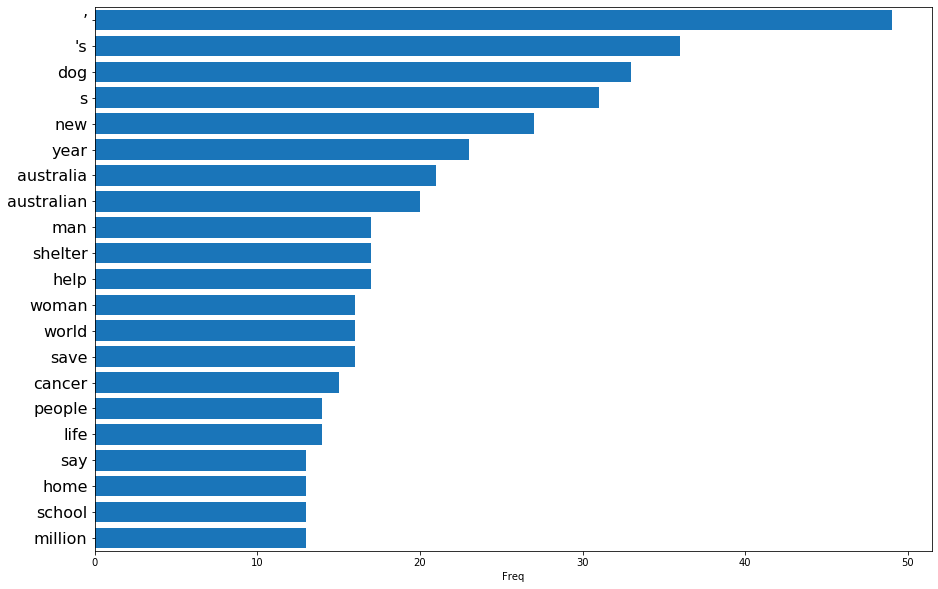

In [179]:
#Declar count vectorizer for EDA purpose
cvec_eda = CountVectorizer(stop_words=sw1, tokenizer=textblob_tokenizer)

#Fit and transform uplifting news DataFrame, convert into new dataframe with frequency occurrance of each token
cvec_eda.fit(df1['post'])
word1 = cvec_eda.transform(df1['post'])
df_word1 = pd.DataFrame(word1.toarray(),columns=cvec_eda.get_feature_names())
df_word1 = pd.DataFrame(df_word1.sum(),columns=['Freq'])

#Plot only the top 20 most occurrance tokens
xplot = df_word1['Freq'].sort_values(ascending=False)[0:21]
yplot = df_word1['Freq'].sort_values(ascending=False).index[0:21]
                                     
plt.figure(figsize=(15, 10))
plt.yticks(fontsize=16)
sns.barplot(xplot,yplot,color='#0079D3')
plt.savefig('../img/uplifting_words.png');
plt.show()

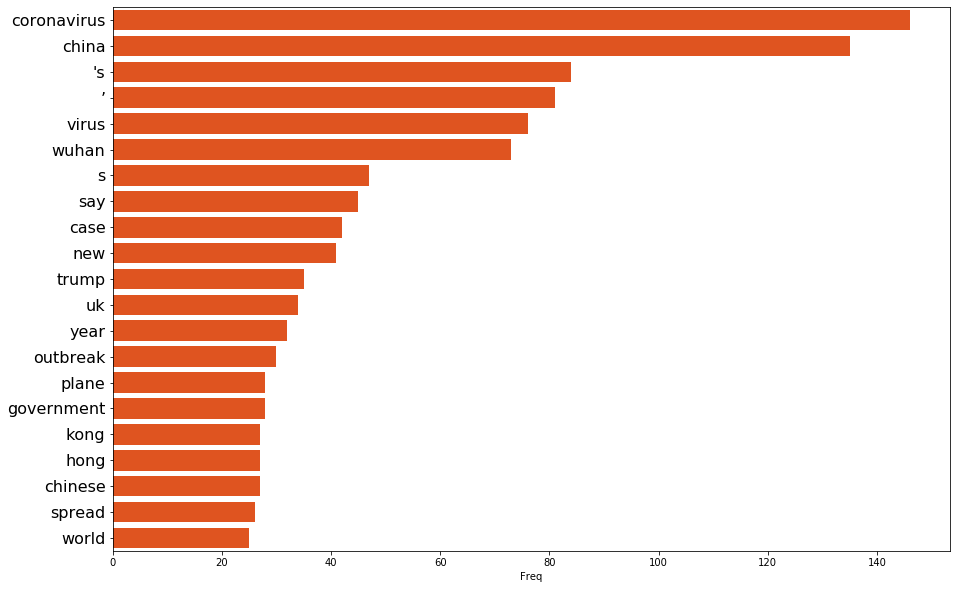

In [180]:
#Fit and transform uplifting news DataFrame, convert into new dataframe with frequency occurrance of each token
cvec_eda.fit(df2['post'])
word2 = cvec_eda.transform(df2['post'])
df_word2 = pd.DataFrame(word2.toarray(),columns=cvec_eda.get_feature_names())
df_word2 = pd.DataFrame(df_word2.sum(),columns=['Freq'])

#Plot only the top 20 most occurrance tokens
xplot = df_word2['Freq'].sort_values(ascending=False)[0:21]
yplot = df_word2['Freq'].sort_values(ascending=False).index[0:21]
                                     
plt.figure(figsize=(15, 10))
plt.yticks(fontsize=16)
sns.barplot(xplot,yplot,color='#FF4500')
plt.savefig('../img/worldnews_words.png');
plt.show()

From the 2 bar plots above, we can see that the tokens that occur the most from each subreddit are highly time/event specific. This make sense as the data obtained from reddit API are limited to 600-700 most recent post and news related subreddit will be affected by current event. This means that the classification model used later, no matter the accuracy, will still have limitations in unseen data as news headline is very time/event specific.

There are also 'dirty' tokens such as '/s' and 's' in both subreddit, these tokens will be taken note of if they appear to be a top key tokens for the classification used later. 

## 2. Model Preparation

In [20]:
X = reddit['post']
y = reddit['subreddit']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33,stratify=y)

## 3. Model Validation

### 3.1. Logistic Regression

#### 3.1.1 Count Vectorizer

In [24]:
pipe_lr_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words=sw1,tokenizer=textblob_tokenizer)),
    ('lr', LogisticRegression(solver='liblinear'))
])

In [25]:
pipe_lr_params = {
    'cvec__max_features': [400,450,500],
    'cvec__min_df': [1,2],
    'cvec__max_df': [.5,.7],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
    'lr__penalty':['l1'],
}
gs1 = GridSearchCV(pipe_lr_cvec, param_grid=pipe_lr_params, verbose=1,cv=3)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.5min finished


0.7854500616522812


{'cvec__max_df': 0.5,
 'cvec__max_features': 400,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__penalty': 'l1'}

In [26]:
gs1.score(X_train, y_train)

0.8890258939580764

In [27]:
gs1.score(X_test, y_test)

0.8118081180811808

#### 3.1.2 TFIDF

In [28]:
pipe_lr_tvec = Pipeline([
    ('tvec',  TfidfVectorizer(stop_words=sw1,tokenizer=textblob_tokenizer)),
    ('lr', LogisticRegression(solver='liblinear'))
])

In [29]:
pipe_lr_params = {
    'tvec__max_features': [400,450,500],
    'tvec__min_df': [1,2],
    'tvec__max_df': [.5,.7],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
    'lr__penalty':['l1'],
}
gs1_1 = GridSearchCV(pipe_lr_tvec, param_grid=pipe_lr_params,verbose=1, cv=3)
gs1_1.fit(X_train, y_train)
print(gs1_1.best_score_)
gs1_1.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.5min finished


0.7237977805178791


{'lr__penalty': 'l1',
 'tvec__max_df': 0.5,
 'tvec__max_features': 400,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 3)}

In [30]:
gs1_1.score(X_train, y_train)

0.8286066584463625

In [31]:
gs1_1.score(X_test, y_test)

0.7896678966789668

In [32]:
print(f'Cvec LR score:{round(gs1.score(X_train, y_train),2)}')
print(f'Tvec LR score:{round(gs1_1.score(X_train, y_train),2)}')

Cvec LR score:0.89
Tvec LR score:0.83


### 3.2. Multinomial

#### 3.2.1. Count Vectorizer

In [33]:
pipe_mn_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words=sw1,tokenizer=textblob_tokenizer)),
    ('nb', MultinomialNB())
])

In [34]:
pipe_mn_params = {
    'cvec__max_features': [400,450,500],
    'cvec__min_df': [1,2],
    'cvec__max_df': [.5,.7],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)],
}
gs2 = GridSearchCV(pipe_mn_cvec, param_grid=pipe_mn_params, verbose=1, cv=3)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.5min finished


0.812577065351418


{'cvec__max_df': 0.5,
 'cvec__max_features': 450,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1)}

In [35]:
gs2.score(X_train, y_train)

0.8754623921085081

In [36]:
gs2.score(X_test, y_test)

0.8191881918819188

#### 3.2.2. TFIDF

In [37]:
pipe_mn_tvec = Pipeline([
    ('tvec',  TfidfVectorizer(stop_words=sw1,tokenizer=textblob_tokenizer)),
    ('nb', MultinomialNB())
])

In [38]:
pipe_mn_params = {
    'tvec__max_features': [400,450,500],
    'tvec__min_df': [1,2],
    'tvec__max_df': [.5,.7],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
}
gs2_1 = GridSearchCV(pipe_mn_tvec, param_grid=pipe_mn_params, verbose=1, cv=3)
gs2_1.fit(X_train, y_train)
print(gs2_1.best_score_)
gs2_1.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.5min finished


0.7977805178791615


{'tvec__max_df': 0.5,
 'tvec__max_features': 400,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [39]:
gs2_1.score(X_train, y_train)

0.8717632552404438

In [40]:
gs2_1.score(X_test, y_test)

0.8154981549815498

In [41]:
print(f'Cvec Mn score:{round(gs2.score(X_train, y_train),2)}')
print(f'Tvec Mn score:{round(gs2_1.score(X_train, y_train),2)}')

Cvec Mn score:0.88
Tvec Mn score:0.87


| Score Comparision |       |
|-------------------|-------|
| Cvec LR score:    | 0\.89 |
| Tvec LR score:    | 0\.83 |
| Cvec Mn score:    | 0\.88 |
| Tvec Mn score:    | 0\.87 |

Logistic Regression model with count vectorizer is chosen as it has slightly higher score than the rest.

## 4. Model Fitting & Prediction

In [157]:
#Delcaring Count Vectorizer with the best parameters found through grid search
cvec = CountVectorizer(max_features = 400, max_df = 0.5, min_df = 2, ngram_range=(1,2),stop_words=sw1,
                       tokenizer=textblob_tokenizer)

In [158]:
#Fit & Transform Data
cvec.fit(X_train)
X_train_CV = cvec.transform(X_train)
X_test_CV = cvec.transform(X_test)

In [159]:
#Model fitting with Logistic Regression
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train_CV,y_train)
#Making Prediction
y_pred = lr.predict(X_test_CV)
print(lr.score(X_train_CV,y_train))
lr.score(X_test_CV,y_test)

0.8890258939580764


0.8118081180811808

## 5. Model Evaluation

### 5.1. Key Tokens 

In [160]:
columns = cvec.get_feature_names()

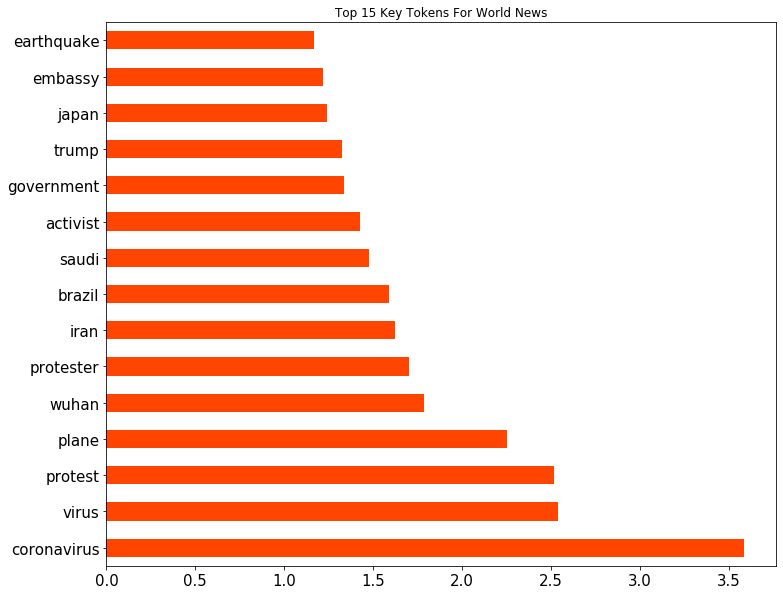

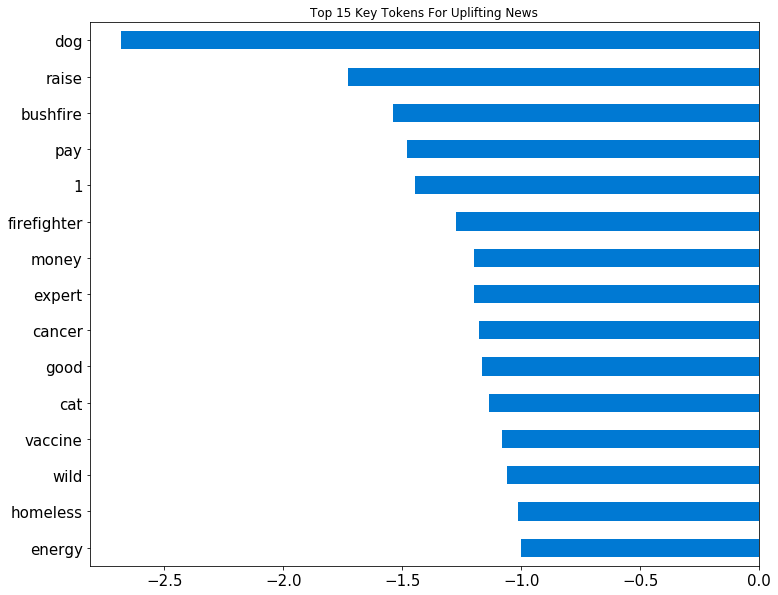

In [181]:
#Plotting horizontal bar graph to show the top 30 coefficients (or 15 keywords from each forum)
lr_coef = pd.DataFrame(lr.coef_,columns=columns)
df_coef = lr_coef.T.sort_values(by=0,ascending=False)
#df_keyword = pd.concat([df_coef.head(15),df_coef.tail(15)],axis=0)
#df_keyword.plot(kind='barh',figsize=(20,15),color='#54B948',title='Top 30 coefficients from Logistic Regression',legend=False,fontsize=15);
df_coef.head(15).plot(kind='barh',figsize=(12,10),color='#FF4500',title='Top 15 Key Tokens For World News',legend=False,fontsize=15)
plt.savefig('../img/worldnews_coef.png');
df_coef.tail(15).plot(kind='barh',figsize=(12,10),color='#0079D3',title='Top 15 Key Tokens For Uplifting News',legend=False,fontsize=15);
plt.savefig('../img/uplifting_coef.png');
plt.show()

From the logistic regression model, we can see the top 15 key tokens from each subreddit; the positive ones from subreddit World News and the negative ones are from subreddit Uplifting News. The key tokens make sense for World News as those are words that made the headline in the past month leading to 31 Jan 2020 (Which also happens to be rather negative terms sadly). 

On the other hand, we can see some positivity from the Australian bushfire situation since related tokens appear in the uplifting news which telly with recent news. Hence, we can say that the logistic model is performing as expected. (Especially when dog is men's best friend!) At the same time, classifying news related subreddit is also very time specific as key tokens from news vary from time to time. For example, using key token such as coronavirus in a post posted same time last year would be meaningless.

In [171]:
df_coef.head(1)

,0
coronavirus,3.585835


In [164]:
df_coef.tail(1)

,0
dog,-2.67964


In [176]:
print(np.exp(df_coef.head(1)[0]))
print('\n')
print(np.exp(-df_coef.tail(1)[0]))

coronavirus    36.083478
Name: 0, dtype: float64


dog    14.579849
Name: 0, dtype: float64


**Intepretation of coefficients**

If a post has the word 'coronavirus', it is 36 times more likely that the post would be classified as y=1 (World News).

If a post has the word 'dog', it is 14.5 times more likely that the post world be classified as y=0 (Uplifting News).

### 5.2. Confusion Matrix

In [47]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 92
False Positives: 11
False Negatives: 41
True Positives: 127


In [48]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.756


In [49]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.8932


In [50]:
# Calculate Accuracy.

spec = (tn + tp)/ (tn + fp+ tp+ fn)

print(f'Accuracy: {round(spec, 4)}')

Accuracy: 0.8081


In [51]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.
pred_proba = [i[1] for i in lr.predict_proba(X_test_CV)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

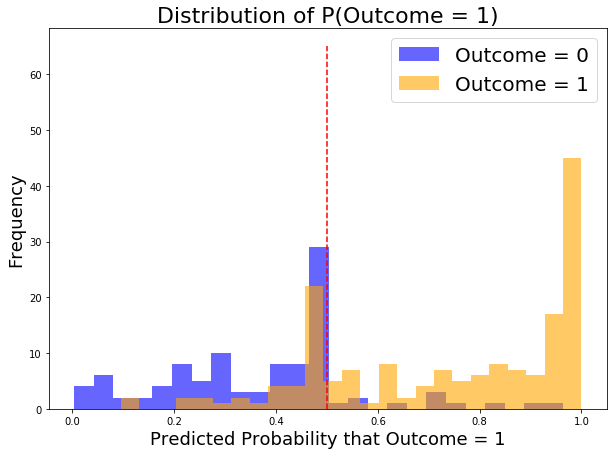

In [52]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

| Confusion Matrix |     |
|------------------|-----|
| True Negatives   | 92  |
| False Positives  | 11  |
| False Negatives  | 40  |
| True Positives   | 128 |



The model is doing quite well in all except classifying the negatives as seen from the overlapped part on the left side of the red dotted line. 40 of the oberservation were wrongly classified as Uplifting News when the post belongs to World News. 

In [53]:
#Making a dataframe to display y_pred, y_test and tokenize X_test
df_y = pd.DataFrame(y_test)
df_y['y_pred'] = y_pred
df_y['X_test'] = X_test
df_y.rename(columns = {'subreddit':'y_test','y_pred':'y_pred','X_test':'X_test'},inplace=True)
df_y['X_test'] = df_y['X_test'].apply(textblob_tokenizer)
df_y.head()

,y_test,y_pred,X_test
267,1,1,"[jhu, csse, developed, an, online, dashboard, to, visualize, and, track, the, reported, case, of, wuhan, coronavirus, 2019-ncov, on, a, daily, timescale]"
26,0,0,"[alberta, man, us, lukewarm, coffee, to, rescue, frozen, abandoned, kitten]"
408,1,1,"[taiwan, offer, virus, help, to, china, but, tightens, visitor, rule]"
382,1,1,"[rudy, pal, lev, parnas, release, hour-long, audio, of, trump, calling, for, ukraine, ambassador, ’, s, firing]"
36,0,0,"[vintage, ford, bronco, sell, for, 650,000, at, auction, for, alzheimer, ’, s, association]"


In [54]:
#Selecting just the false negative classification into another dataframe
df_fn = df_y[(df_y['y_test']==1) & (df_y['y_pred']==0)]

#Create a list for all the coefficients that help to classify post into Uplifting News (y=0)
wrong_token=[]
df_upcoef = df_coef[df_coef[0]<0]
uplifting_token = list(df_upcoef.index.values)

#locate the token that causes false negative classification
for i in df_fn['X_test']:
    for j in i:
        if j in uplifting_token:
            wrong_token.append(j)
wrong_token = set(wrong_token)
wrong_token

{'1',
 'animal',
 'australian',
 'bushfire',
 'child',
 'emission',
 'expert',
 'family',
 'food',
 'global',
 'health',
 'high',
 'lead',
 'lost',
 'man',
 'money',
 'new',
 'pay',
 'public',
 'raise',
 'scientist',
 'wild',
 'woman'}

By taking a closer look at the tokens within the X_test of the False Negatives, we can generate a list (see above) of tokens which contribute to the misclassficiation of False Negative by comparing with the key tokens with negative coefficient (Which are the key tokens for y=0, i.e Uplifting News). 

Due to the nature of the subreddits, overlapping of tokens are bound to happen and the tokens can also changes accordingly to the world event around the world. We can optimise the specificity and sensitivity by add this list into the stop words list or create a better model by having more posts from subreddit over a longer period of time. However, since the objective of this project is to classify the post correctly into the right subreddit and the model is able to achieve higher than baseline accuracy, we can safely assume that the model is performing as expected.

| Accuracy Comparison |       |
|---------------------|-------|
| Baseline Accuracy   | 0\.62 |
| Model Accuracy      | 0\.81 |


## 6. Conclusion & Recommendations

Logistic Regression (LR) model was compared with Multinomial(MN) model for the model validation process, and LR was chosen as the better model for classification of the subreddit posts based on the score obtained through Gridsearch Cross Validation. 

| Score Comparision |       |
|-------------------|-------|
| **Cvec LR score:**    | **0\.89** |
| Tvec LR score:    | 0\.83 |
| Cvec Mn score:    | 0\.88 |
| Tvec Mn score:    | 0\.87 |

The LR classification model perform as expected, with an accuracy higher than that of baseline accuracy.

| Accuracy Comparison |       |
|---------------------|-------|
| Baseline Accuracy   | 0\.62 |
| **Model Accuracy**      | **0\.81** |

From the LR model, we are able to show the key tokens from each subreddit that contribute to classifying the posts from the coefficient. 

![worldnews_coef](..\img\worldnews_coef.png)
![uplifting_coef](..\img\uplifting_coef.png)

The key tokens make sense for World News as those are words that made the headline in the past month leading to 31 Jan 2020 (Which also happens to be rather negative terms, sadly). 

On the other hand, we can see some positivity from the Australian bushfire situation since related tokens appear in the uplifting news which telly with recent news. Hence, we can say that the logistic model is performing as expected. (Especially when dog is men's best friend!) 

At the same time, classifiying news related subreddit is also very time specific as key tokens from news vary from time to time. For example, using key token such as coronavirus in a post posted same time last year would be rather meaningless.

An evaluation of the LR model was also done, specifically on the False Negative classification. 

| Confusion Matrix |     |
|------------------|-----|
| True Negatives   | 92  |
| False Positives  | 11  |
| False Negatives  | 40  |
| True Positives   | 128 |

It is found that some of the key tokens for Uplifting News are contributing to the misclassfication of false negative as these tokens also appear on 40 posts from World News. However, since the objective of this project is to classify the post correctly into the right subreddit and the LR model is able to achieve higher than baseline accuracy, we can safely assume that the model is performing as expected.

**Recommendation**

Due to the limitation on the number of posts we can request using subreddit API, the model can only be trained on the most recent 500-700 posts. The model would be more accurate and less time-depedent if more historic data of the posts can be used to train the LR model. 

